In [1]:
cd

/Users/vedasamhithadyawanapally


In [2]:
cd /Users/vedasamhithadyawanapally/Desktop/Housing_Price_Prediction_ML_Project


/Users/vedasamhithadyawanapally/Desktop/Housing_Price_Prediction_ML_Project


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("housing.csv")

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Exploratory Data Analysis

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note: Null Values are there in Total_Bedrooms column,hence we are dropping the Nan Values

In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Splitting into training and testing data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop(['median_house_value'],axis=1)
Y = data['median_house_value']

In [14]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [17]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [78]:
X_train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.2)

Note: Using 20% of the data for testing

In [79]:
train_data = X_train.join(Y_Train)

In [80]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17086,-122.21,37.47,26.0,1777.0,555.0,1966.0,497.0,3.0472,NEAR OCEAN,211000.0
5971,-117.79,34.10,26.0,1664.0,344.0,1024.0,339.0,3.5192,INLAND,190500.0
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,NEAR BAY,103100.0
5013,-118.33,34.01,44.0,2182.0,492.0,878.0,493.0,1.9631,<1H OCEAN,181300.0
8587,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,<1H OCEAN,379300.0
...,...,...,...,...,...,...,...,...,...,...
16201,-121.27,37.94,38.0,512.0,133.0,676.0,124.0,1.7386,INLAND,52000.0
18658,-121.94,36.98,24.0,3010.0,562.0,1360.0,504.0,4.2006,NEAR OCEAN,290700.0
10838,-117.92,33.67,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1H OCEAN,430900.0
20499,-118.71,34.30,23.0,1983.0,280.0,978.0,287.0,6.3199,<1H OCEAN,236700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

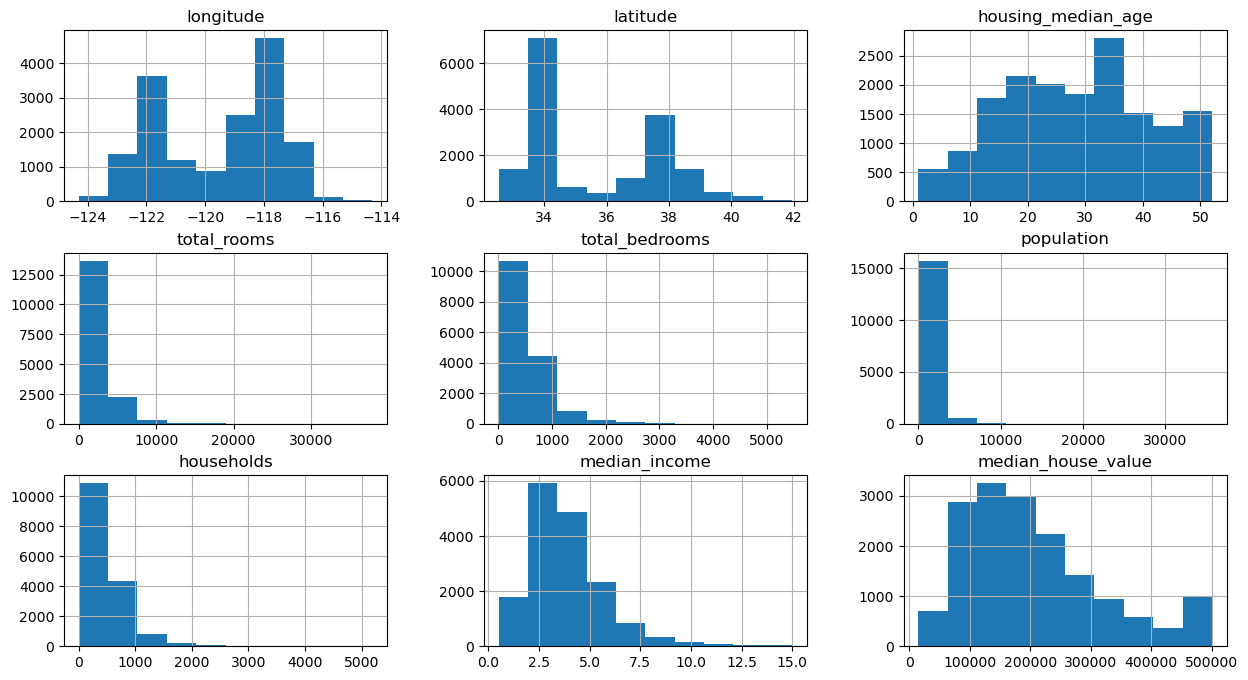

In [81]:
train_data.hist(figsize= (15,8))

In [82]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924612,-0.105990,0.048687,0.073953,0.106805,0.061436,-0.018624,-0.044810
latitude,-0.924612,1.000000,0.007874,-0.040154,-0.071266,-0.114694,-0.076441,-0.078287,-0.146207
housing_median_age,-0.105990,0.007874,1.000000,-0.367273,-0.326621,-0.300392,-0.308130,-0.120793,0.109120
total_rooms,0.048687,-0.040154,-0.367273,1.000000,0.928537,0.859427,0.918926,0.202413,0.137636
total_bedrooms,0.073953,-0.071266,-0.326621,0.928537,1.000000,0.878992,0.980909,-0.005194,0.054008
population,0.106805,-0.114694,-0.300392,0.859427,0.878992,1.000000,0.907405,0.008239,-0.022980
households,0.061436,-0.076441,-0.308130,0.918926,0.980909,0.907405,1.000000,0.015849,0.068888
median_income,-0.018624,-0.078287,-0.120793,0.202413,-0.005194,0.008239,0.015849,1.000000,0.689387
median_house_value,-0.044810,-0.146207,0.109120,0.137636,0.054008,-0.022980,0.068888,0.689387,1.000000


<Axes: >

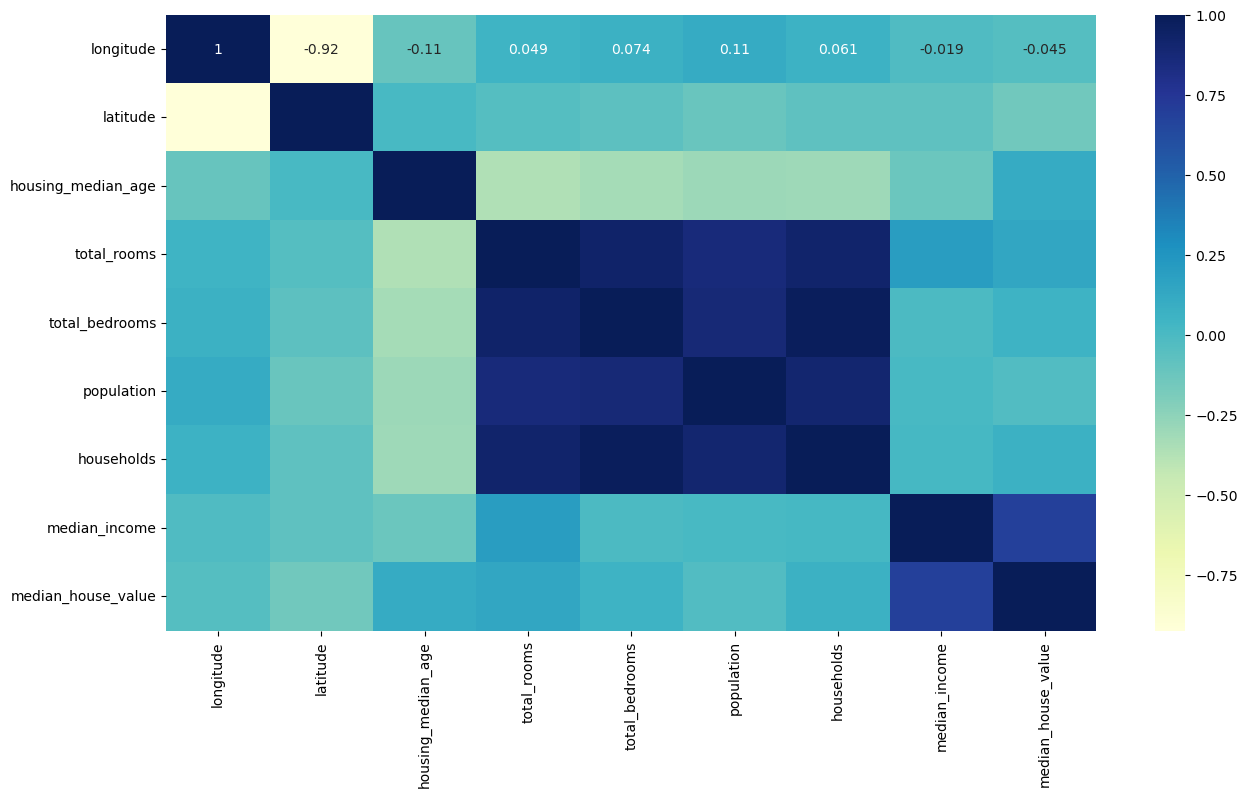

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

Observation: Median_Income is highly correlated in determing  the median_house_value where as latitude is negatively correlated with Median_House_value

In [84]:
train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

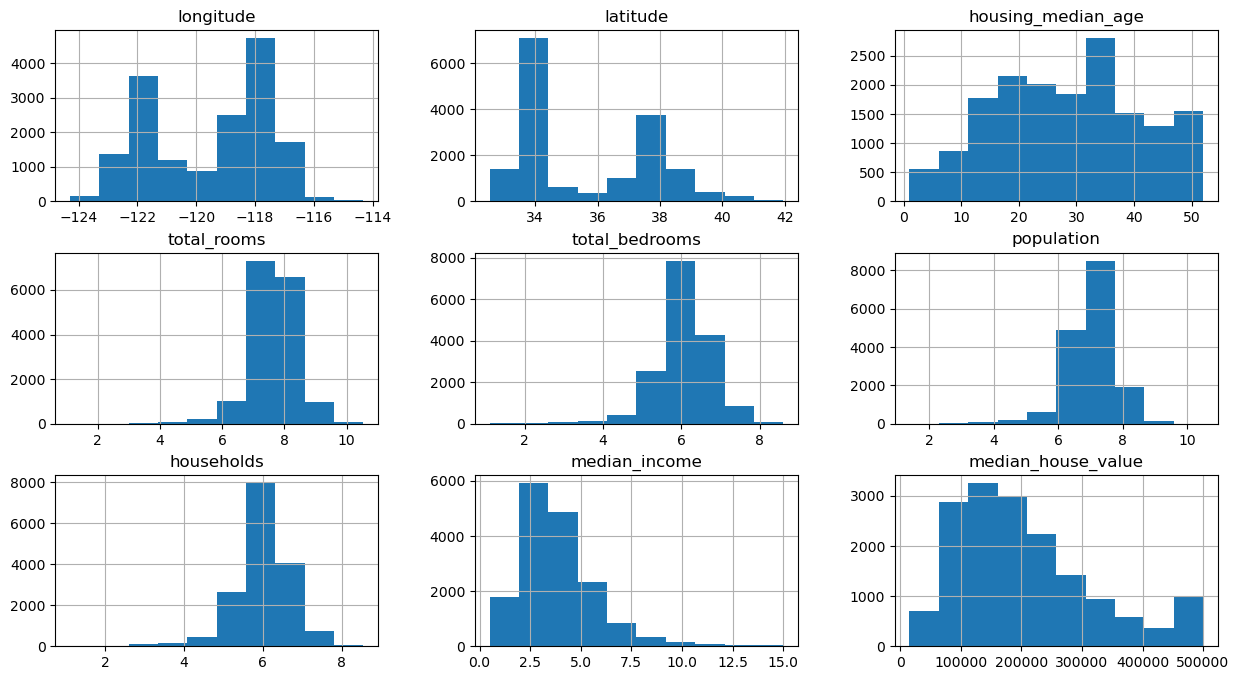

In [85]:
train_data.hist(figsize=(15,8))

In [86]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7240
INLAND        5193
NEAR OCEAN    2112
NEAR BAY      1798
ISLAND           3
Name: ocean_proximity, dtype: int64

In [87]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17086,0,0,0,0,1
5971,0,1,0,0,0
18898,0,0,0,1,0
5013,1,0,0,0,0
8587,1,0,0,0,0
...,...,...,...,...,...
16201,0,1,0,0,0
18658,0,0,0,0,1
10838,1,0,0,0,0
20499,1,0,0,0,0


In [88]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17086,-122.21,37.47,26.0,7.483244,6.320768,7.584265,6.210600,3.0472,NEAR OCEAN,211000.0,0,0,0,0,1
5971,-117.79,34.10,26.0,7.417580,5.843544,6.932448,5.828946,3.5192,INLAND,190500.0,0,1,0,0,0
18898,-122.25,38.11,49.0,7.768956,6.224558,7.031741,6.129050,2.6133,NEAR BAY,103100.0,0,0,0,1,0
5013,-118.33,34.01,44.0,7.688455,6.200509,6.778785,6.202536,1.9631,<1H OCEAN,181300.0,1,0,0,0,0
8587,-118.38,33.89,35.0,7.483807,5.802118,6.597146,5.746203,6.5745,<1H OCEAN,379300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16201,-121.27,37.94,38.0,6.240276,4.897840,6.517671,4.828314,1.7386,INLAND,52000.0,0,1,0,0,0
18658,-121.94,36.98,24.0,8.010028,6.333280,7.215975,6.224558,4.2006,NEAR OCEAN,290700.0,0,0,0,0,1
10838,-117.92,33.67,14.0,8.736329,7.426549,8.054840,7.371489,4.2071,<1H OCEAN,430900.0,1,0,0,0,0
20499,-118.71,34.30,23.0,7.592870,5.638355,6.886532,5.662960,6.3199,<1H OCEAN,236700.0,1,0,0,0,0


In [89]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17086,-122.21,37.47,26.0,7.483244,6.320768,7.584265,6.210600,3.0472,211000.0,0,0,0,0,1
5971,-117.79,34.10,26.0,7.417580,5.843544,6.932448,5.828946,3.5192,190500.0,0,1,0,0,0
18898,-122.25,38.11,49.0,7.768956,6.224558,7.031741,6.129050,2.6133,103100.0,0,0,0,1,0
5013,-118.33,34.01,44.0,7.688455,6.200509,6.778785,6.202536,1.9631,181300.0,1,0,0,0,0
8587,-118.38,33.89,35.0,7.483807,5.802118,6.597146,5.746203,6.5745,379300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16201,-121.27,37.94,38.0,6.240276,4.897840,6.517671,4.828314,1.7386,52000.0,0,1,0,0,0
18658,-121.94,36.98,24.0,8.010028,6.333280,7.215975,6.224558,4.2006,290700.0,0,0,0,0,1
10838,-117.92,33.67,14.0,8.736329,7.426549,8.054840,7.371489,4.2071,430900.0,1,0,0,0,0
20499,-118.71,34.30,23.0,7.592870,5.638355,6.886532,5.662960,6.3199,236700.0,1,0,0,0,0


In [90]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

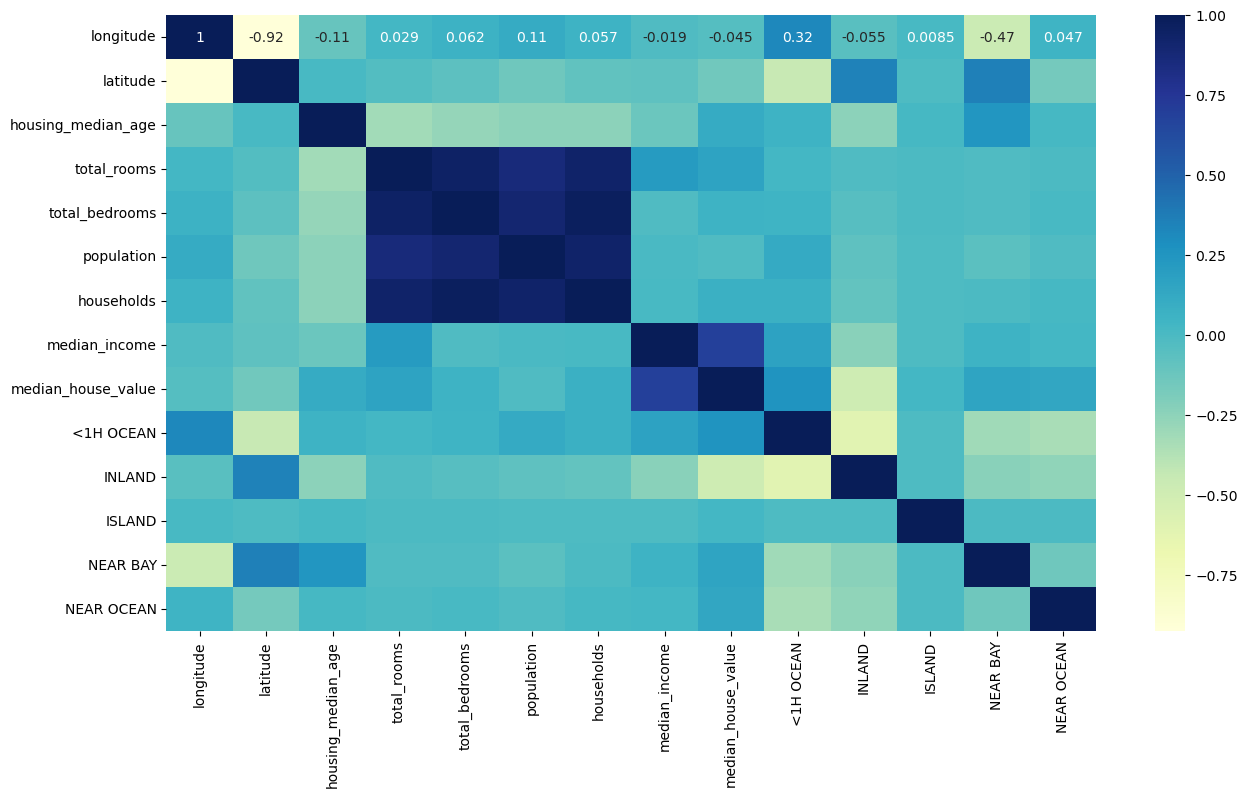

In [91]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

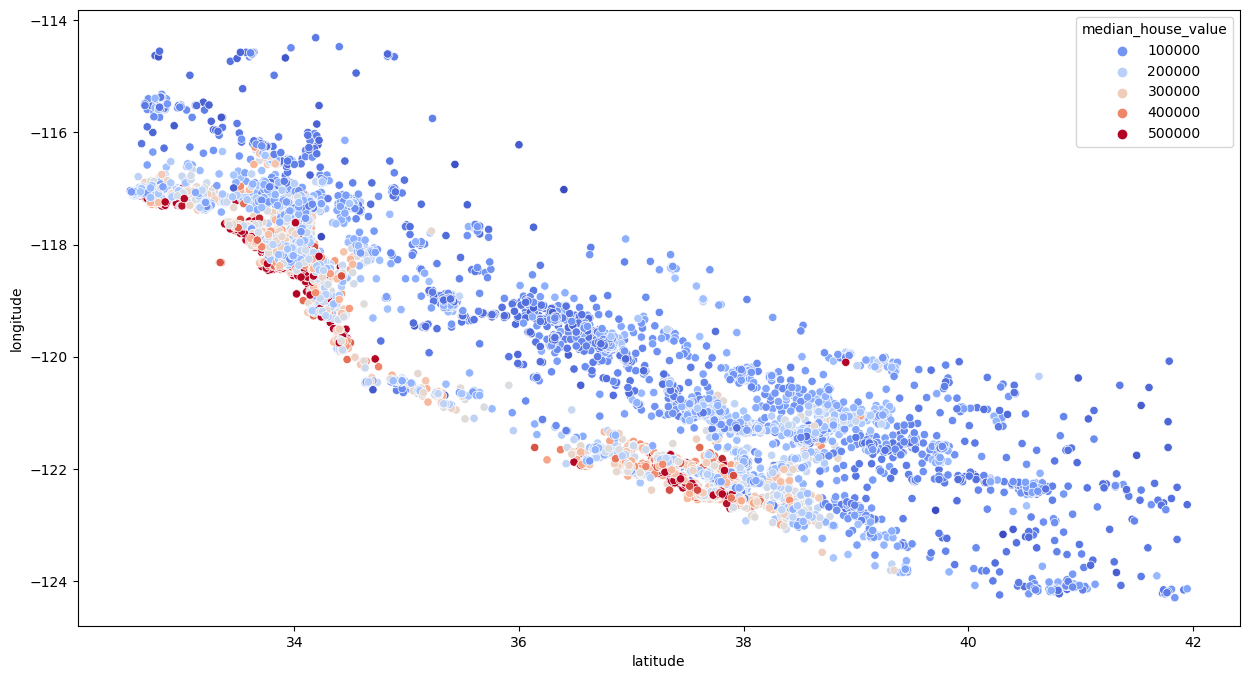

In [92]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [93]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

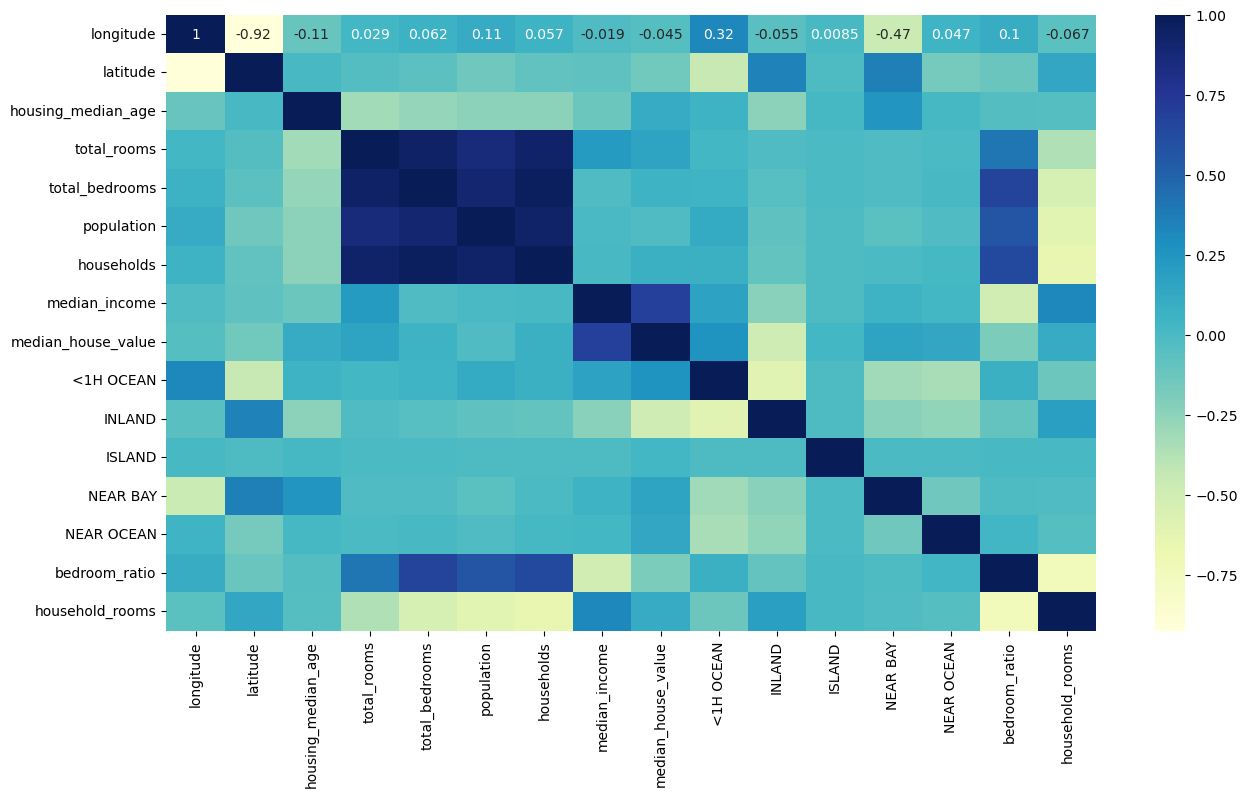

In [94]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()




In [103]:
X_train,Y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [99]:
test_data = X_Test.join(Y_Test)

test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [100]:
X_Test,Y_Test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [101]:
reg.score(X_Test,Y_Test)

0.6553958261644828

In [104]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [105]:
X_Test,Y_Test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [109]:
X_Test_s = scaler.transform(X_Test)

In [110]:
reg.score(X_Test_s,Y_Test)

0.6553961094391514

Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s,Y_train)


RandomForestRegressor()

In [115]:
forest.score(X_Test_s,Y_Test)

0.8176832222375225

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
forest = RandomForestRegressor()

In [121]:
param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s,Y_train)
    

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [122]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [123]:
best_forest = grid_search.best_estimator_

In [125]:
best_forest.score(X_Test_s,Y_Test)

0.8123574844859028

In [127]:
param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split":[2,4],
    "max_depth": [None,4,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s,Y_train)
    

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [129]:
best_forest1=grid_search.best_estimator_

In [130]:
best_forest1.score(X_Test_s,Y_Test)

0.8177115959776957